### Step 1: Reading and Understanding the Data

Let us first import the necessary libraries

In [1]:
# Suppress warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk


In [3]:
boombikes = pd.read_csv('day.csv')
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
boombikes.shape

(730, 16)

In [5]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Check for missing values
boombikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
boombikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
# Distinguish between categorical and numerical variables

num_vars = boombikes[['cnt', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']]
cat_vars = boombikes[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]

### Step 2: Visualizing the data

<Figure size 2000x1200 with 0 Axes>

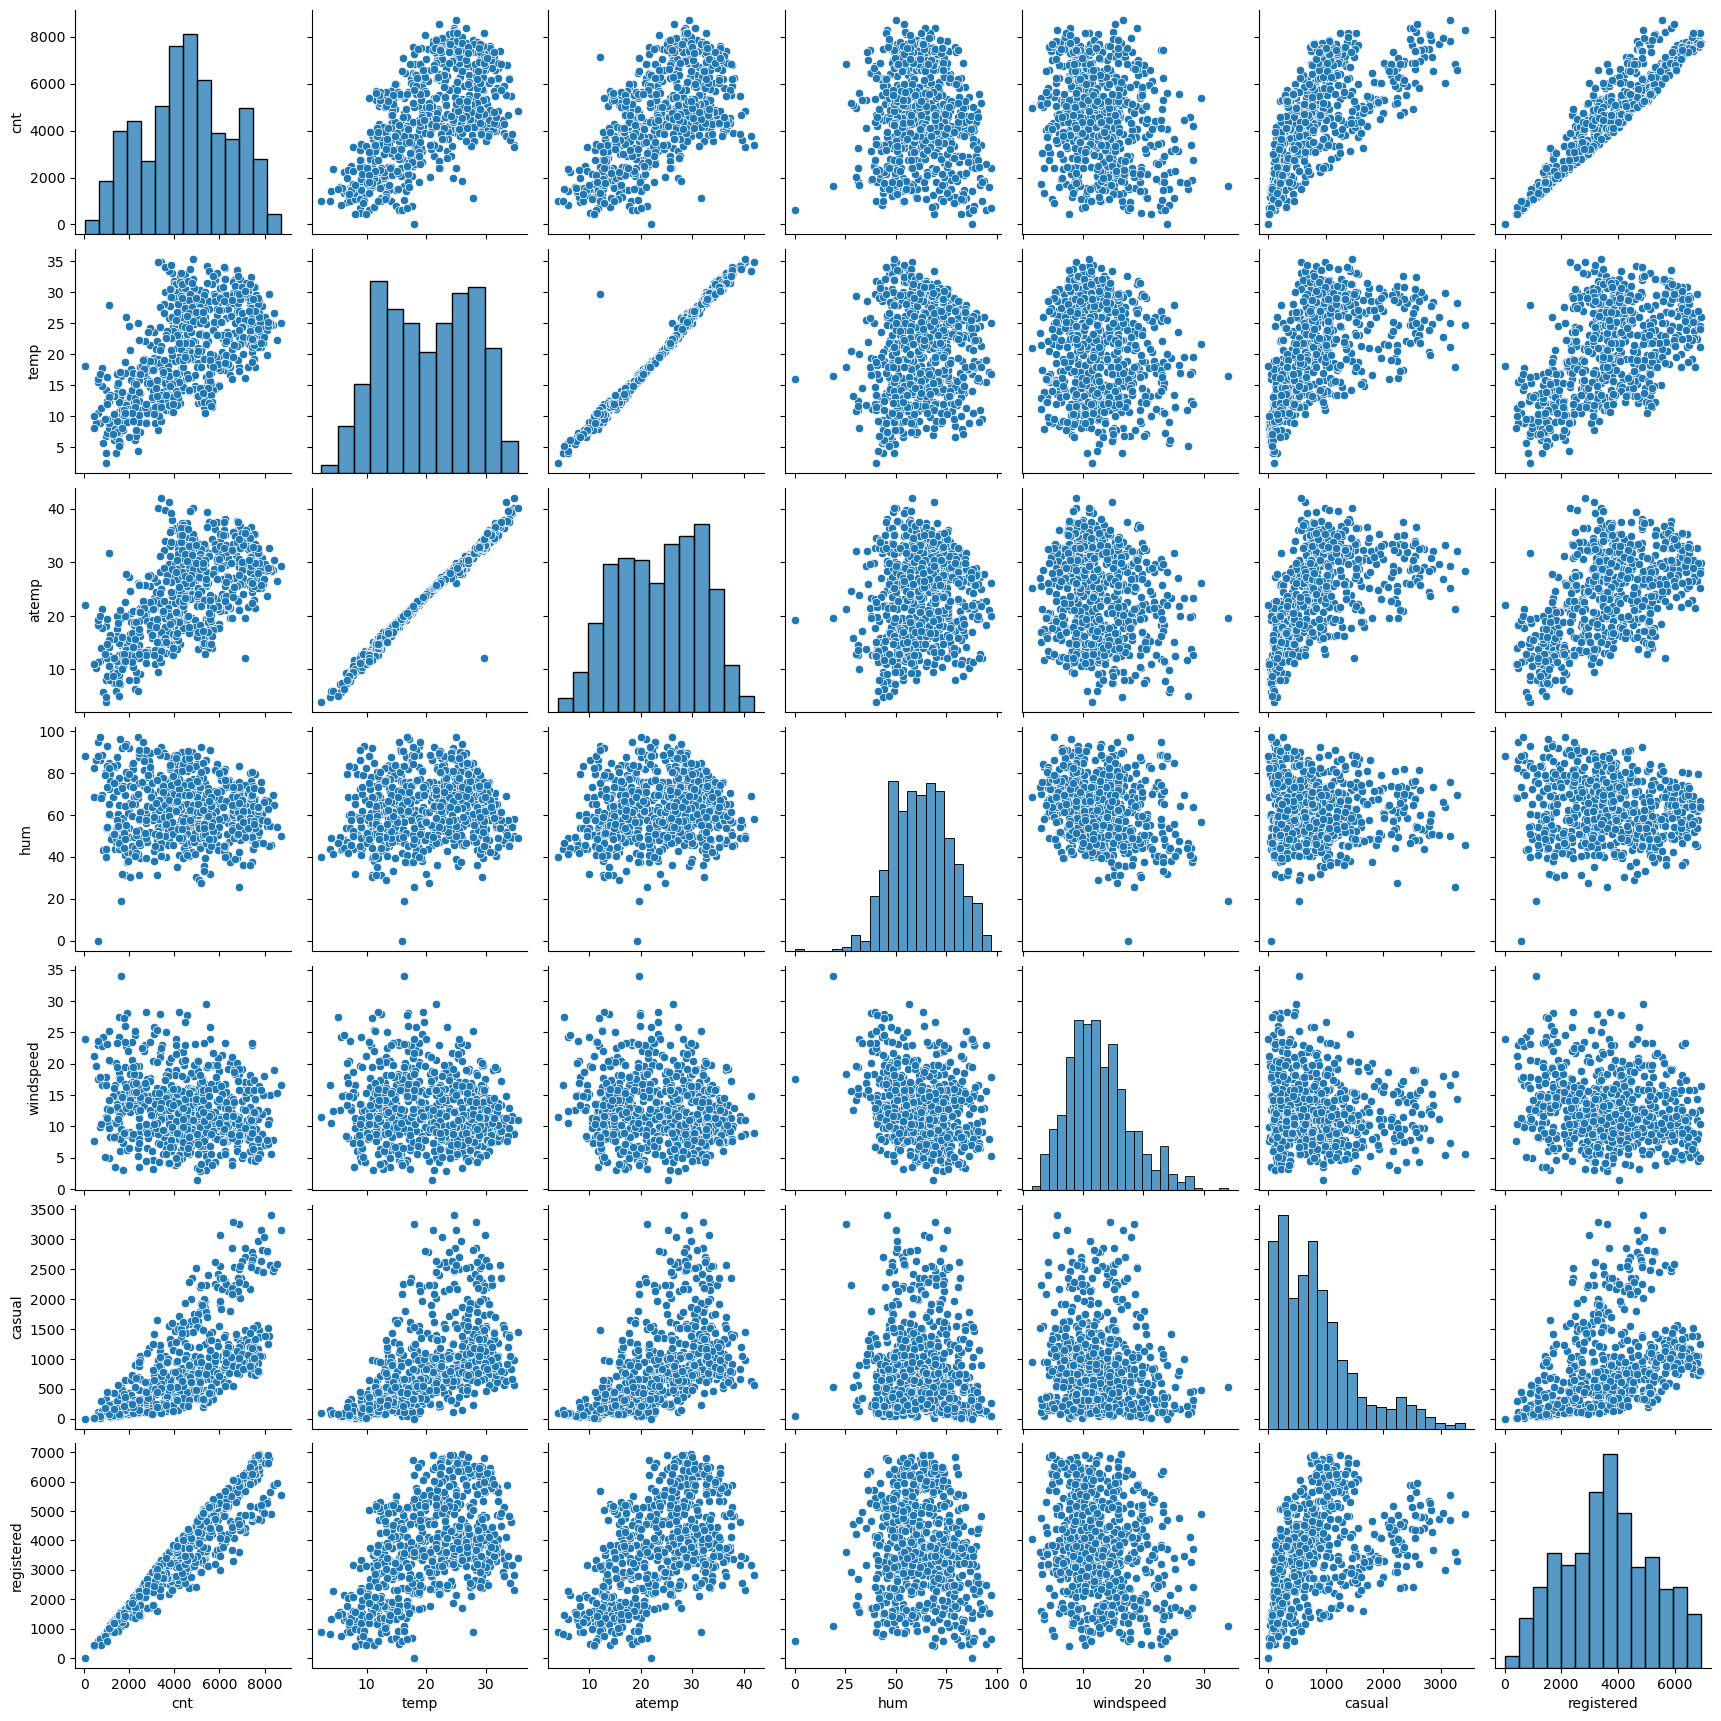

In [10]:
# Visualize the numerical variables

plt.figure(figsize=(20, 12))
sns.pairplot(num_vars)
plt.show()

#### Observation: 
    
    We see a linear relation between cnt (target variable) and registered, casual, atemp and temp

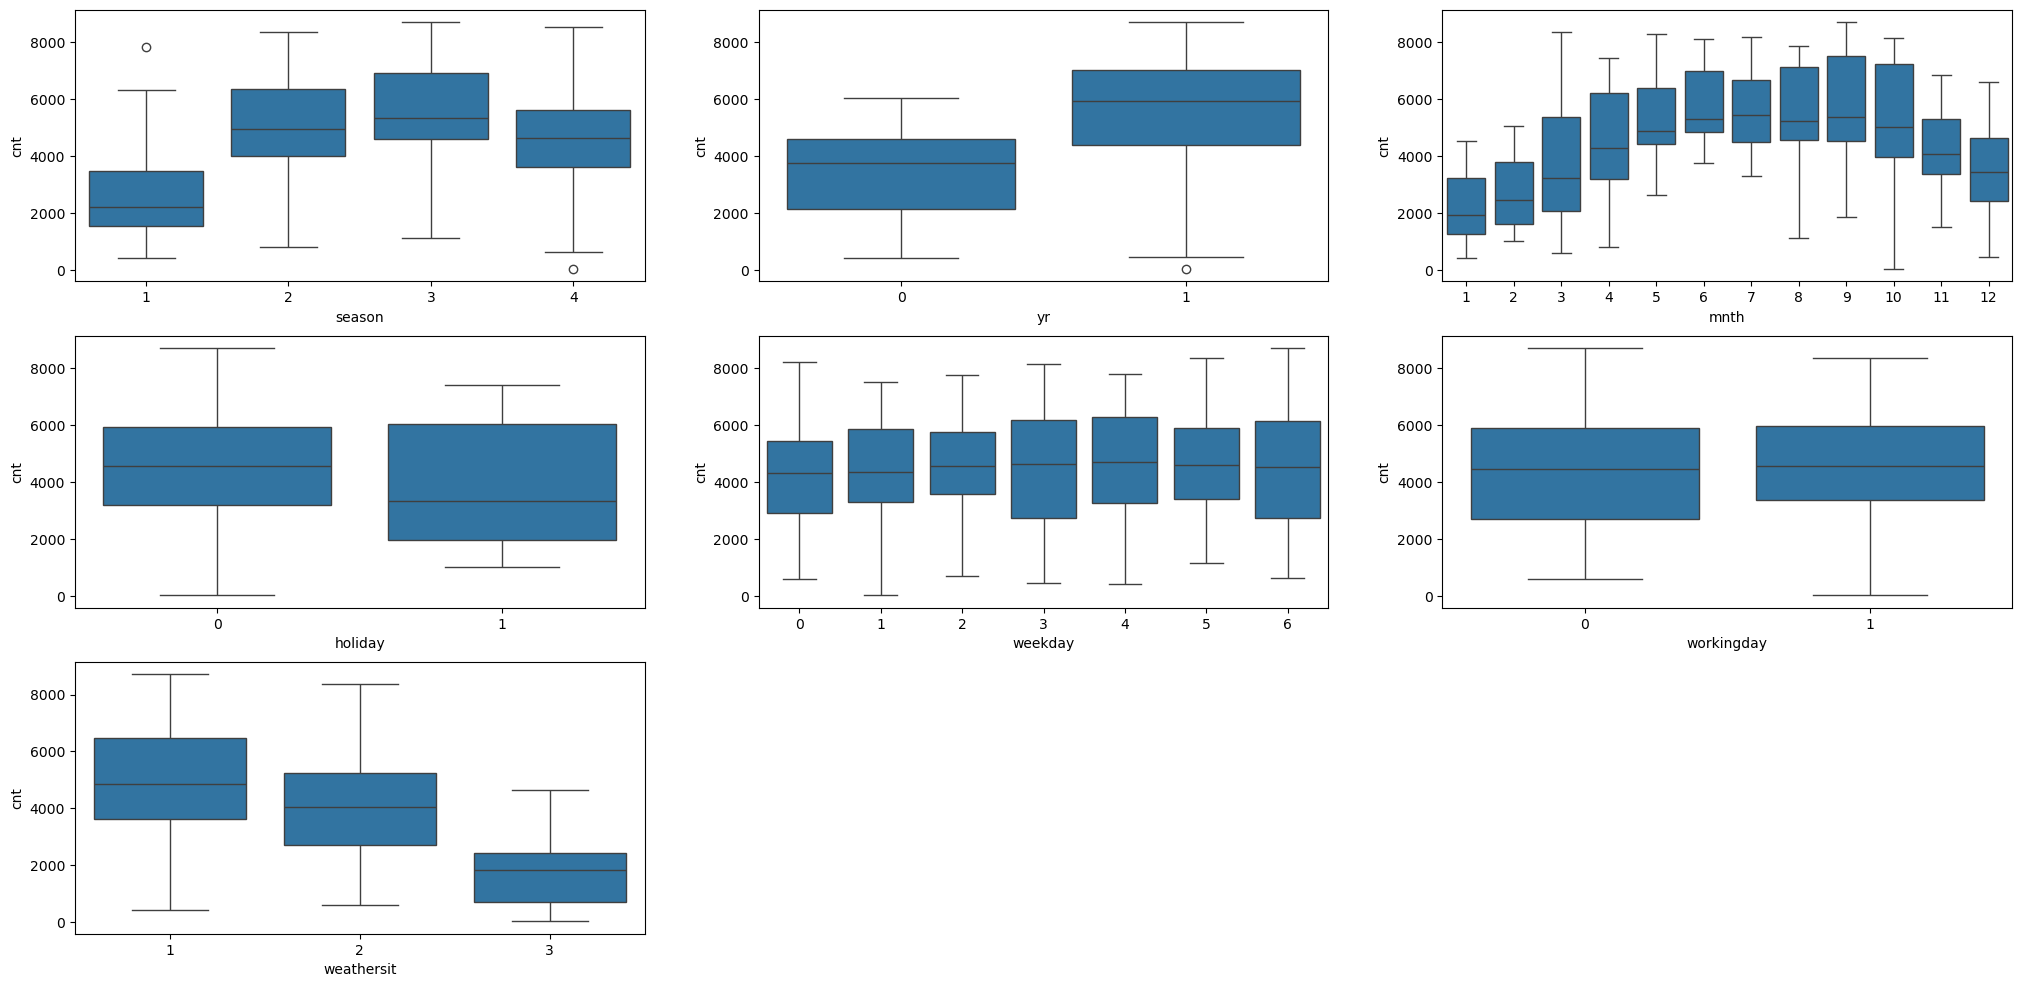

In [11]:
# Visualize the categorical variables

plt.figure(figsize=(25, 12))

for i, var in enumerate(cat_vars):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=var, y='cnt', data=boombikes)
plt.show()


#### Observation:

- season: 
    - We observe an order fall, summer, winter and then spring.
    - Median in fall approx 5000
- yr:
    - We can observe an increase of bike bookings in 2019 in comparison to 2018
- mnth:
    - Bookings in months of 4,5,6,7,8,9 and 10 observe that median is over 4000
- holiday:
    - Higher bookings when there is no holiday
- weekday: 
    - Almost close median on all days of the week
- workingday:
    - Almost close to 5000 median bookings regardless of it being a holiday or not
- weathersit:
    - Major booking when weathersit is 1, followed by 2 and 3
    - No booking when weathersit is 4


### Step 3: Preparing the data
    - Converting categorical variables to numerical
        - Converting yes/no to 1/0
        - Converting other categorical variables to dummy variables

In [12]:
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##### 3.1: Dropping unncessary columns

In [13]:
# Dropping redundant columns - 'instant', 'dteday'
# instant - index column - not required
# dteday - date column - not required because we have 'yr', 'mnth' columns
# casual and registered columns are not required because they are directly related to the target variable 'cnt'

# Drop the columns

boombikes.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


##### 3.2 Creating dummry variables

There are no Yes/No variables, variables like workingday and holiday are already in int

So let's work on creating dummy variables for categorical variables

In [14]:
# cat_vars = boombikes[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]

# Converting 'season', 'yr', 'mnth', 'weekday', 'weathersit' to categorical variables

# Before converting, let's rename the values of the above columns because they will be converted to dummy variables

boombikes['season'] = boombikes['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
boombikes['yr'] = boombikes['yr'].map({0: '2018', 1: '2019'})
boombikes['mnth'] = boombikes['mnth'].map({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'june', 7: 'july', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'})
boombikes['weekday'] = boombikes['weekday'].map({0: 'sun', 1: 'mon', 2: 'tue', 3: 'wed', 4: 'thu', 5: 'fri', 6: 'sat'})
boombikes['weathersit'] = boombikes['weathersit'].map({1: 'clear', 2: 'mist', 3: 'light_snow', 4: 'heavy_rain'})
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
# Creating dummy variables for 'season', 'yr', 'mnth', 'weekday', 'weathersit'

season = pd.get_dummies(boombikes['season'], drop_first=True, dtype=int)
yr = pd.get_dummies(boombikes['yr'], drop_first=True, dtype=int)
mnth = pd.get_dummies(boombikes['mnth'], drop_first=True, dtype=int)
weekday = pd.get_dummies(boombikes['weekday'], drop_first=True, dtype=int)
weathersit = pd.get_dummies(boombikes['weathersit'], drop_first=True, dtype=int)

In [16]:
# Concatenating the dummy variables to the original dataframe
boombikes = pd.concat([boombikes, season, yr, mnth, weekday, weathersit], axis=1)

In [17]:
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,oct,sep,mon,sat,sun,thu,tue,wed,light_snow,mist
0,spring,2018,jan,0,sat,0,mist,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,2018,jan,0,sun,0,mist,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,spring,2018,jan,0,mon,1,clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,2018,jan,0,tue,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,spring,2018,jan,0,wed,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [18]:
# Dropping the original columns for which we have created dummy variables

boombikes.drop(['season', 'yr', 'mnth', 'weekday', 'weathersit'], axis=1, inplace=True)
boombikes.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,light_snow,mist
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


- Dropped columns:
    - 'season', 'yr', 'mnth', 'weekday', 'weathersit'

- Converted columns:
    - season:
        - spring, summer, winter
        - fall is 1 when all the above are 0
    - yr:
        - 2019
        - 2018 is 1 when 2019 is 0
    - mnth:
        - april is dropped
    - weekday:
        - fri is dropped
    - weathersit:
        - light_snow, mist
        - clear is dropped
        - Heavy Rain had no entries

In [19]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   holiday     730 non-null    int64  
 1   workingday  730 non-null    int64  
 2   temp        730 non-null    float64
 3   atemp       730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   spring      730 non-null    int64  
 8   summer      730 non-null    int64  
 9   winter      730 non-null    int64  
 10  2019        730 non-null    int64  
 11  aug         730 non-null    int64  
 12  dec         730 non-null    int64  
 13  feb         730 non-null    int64  
 14  jan         730 non-null    int64  
 15  july        730 non-null    int64  
 16  june        730 non-null    int64  
 17  mar         730 non-null    int64  
 18  may         730 non-null    int64  
 19  nov         730 non-null    i

### Step 4: Splitting the data in training and test data set

In [20]:
# Splitting the data into train and test sets

from sklearn.model_selection import train_test_split

np.random.seed(0) 
df_train, df_test = train_test_split(boombikes, train_size=0.7, test_size=0.3, random_state=100)

df_train.shape

df_test.shape


(219, 30)

##### Step 4.1: Scaling the training data

In [21]:
# Rescaling the features - MinMax scaling

from sklearn.preprocessing import MinMaxScaler

# 1 - Instantiate an object
scaler = MinMaxScaler()

# Numerical 
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# 2 - Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,light_snow,mist
653,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [22]:
df_train.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,light_snow,mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


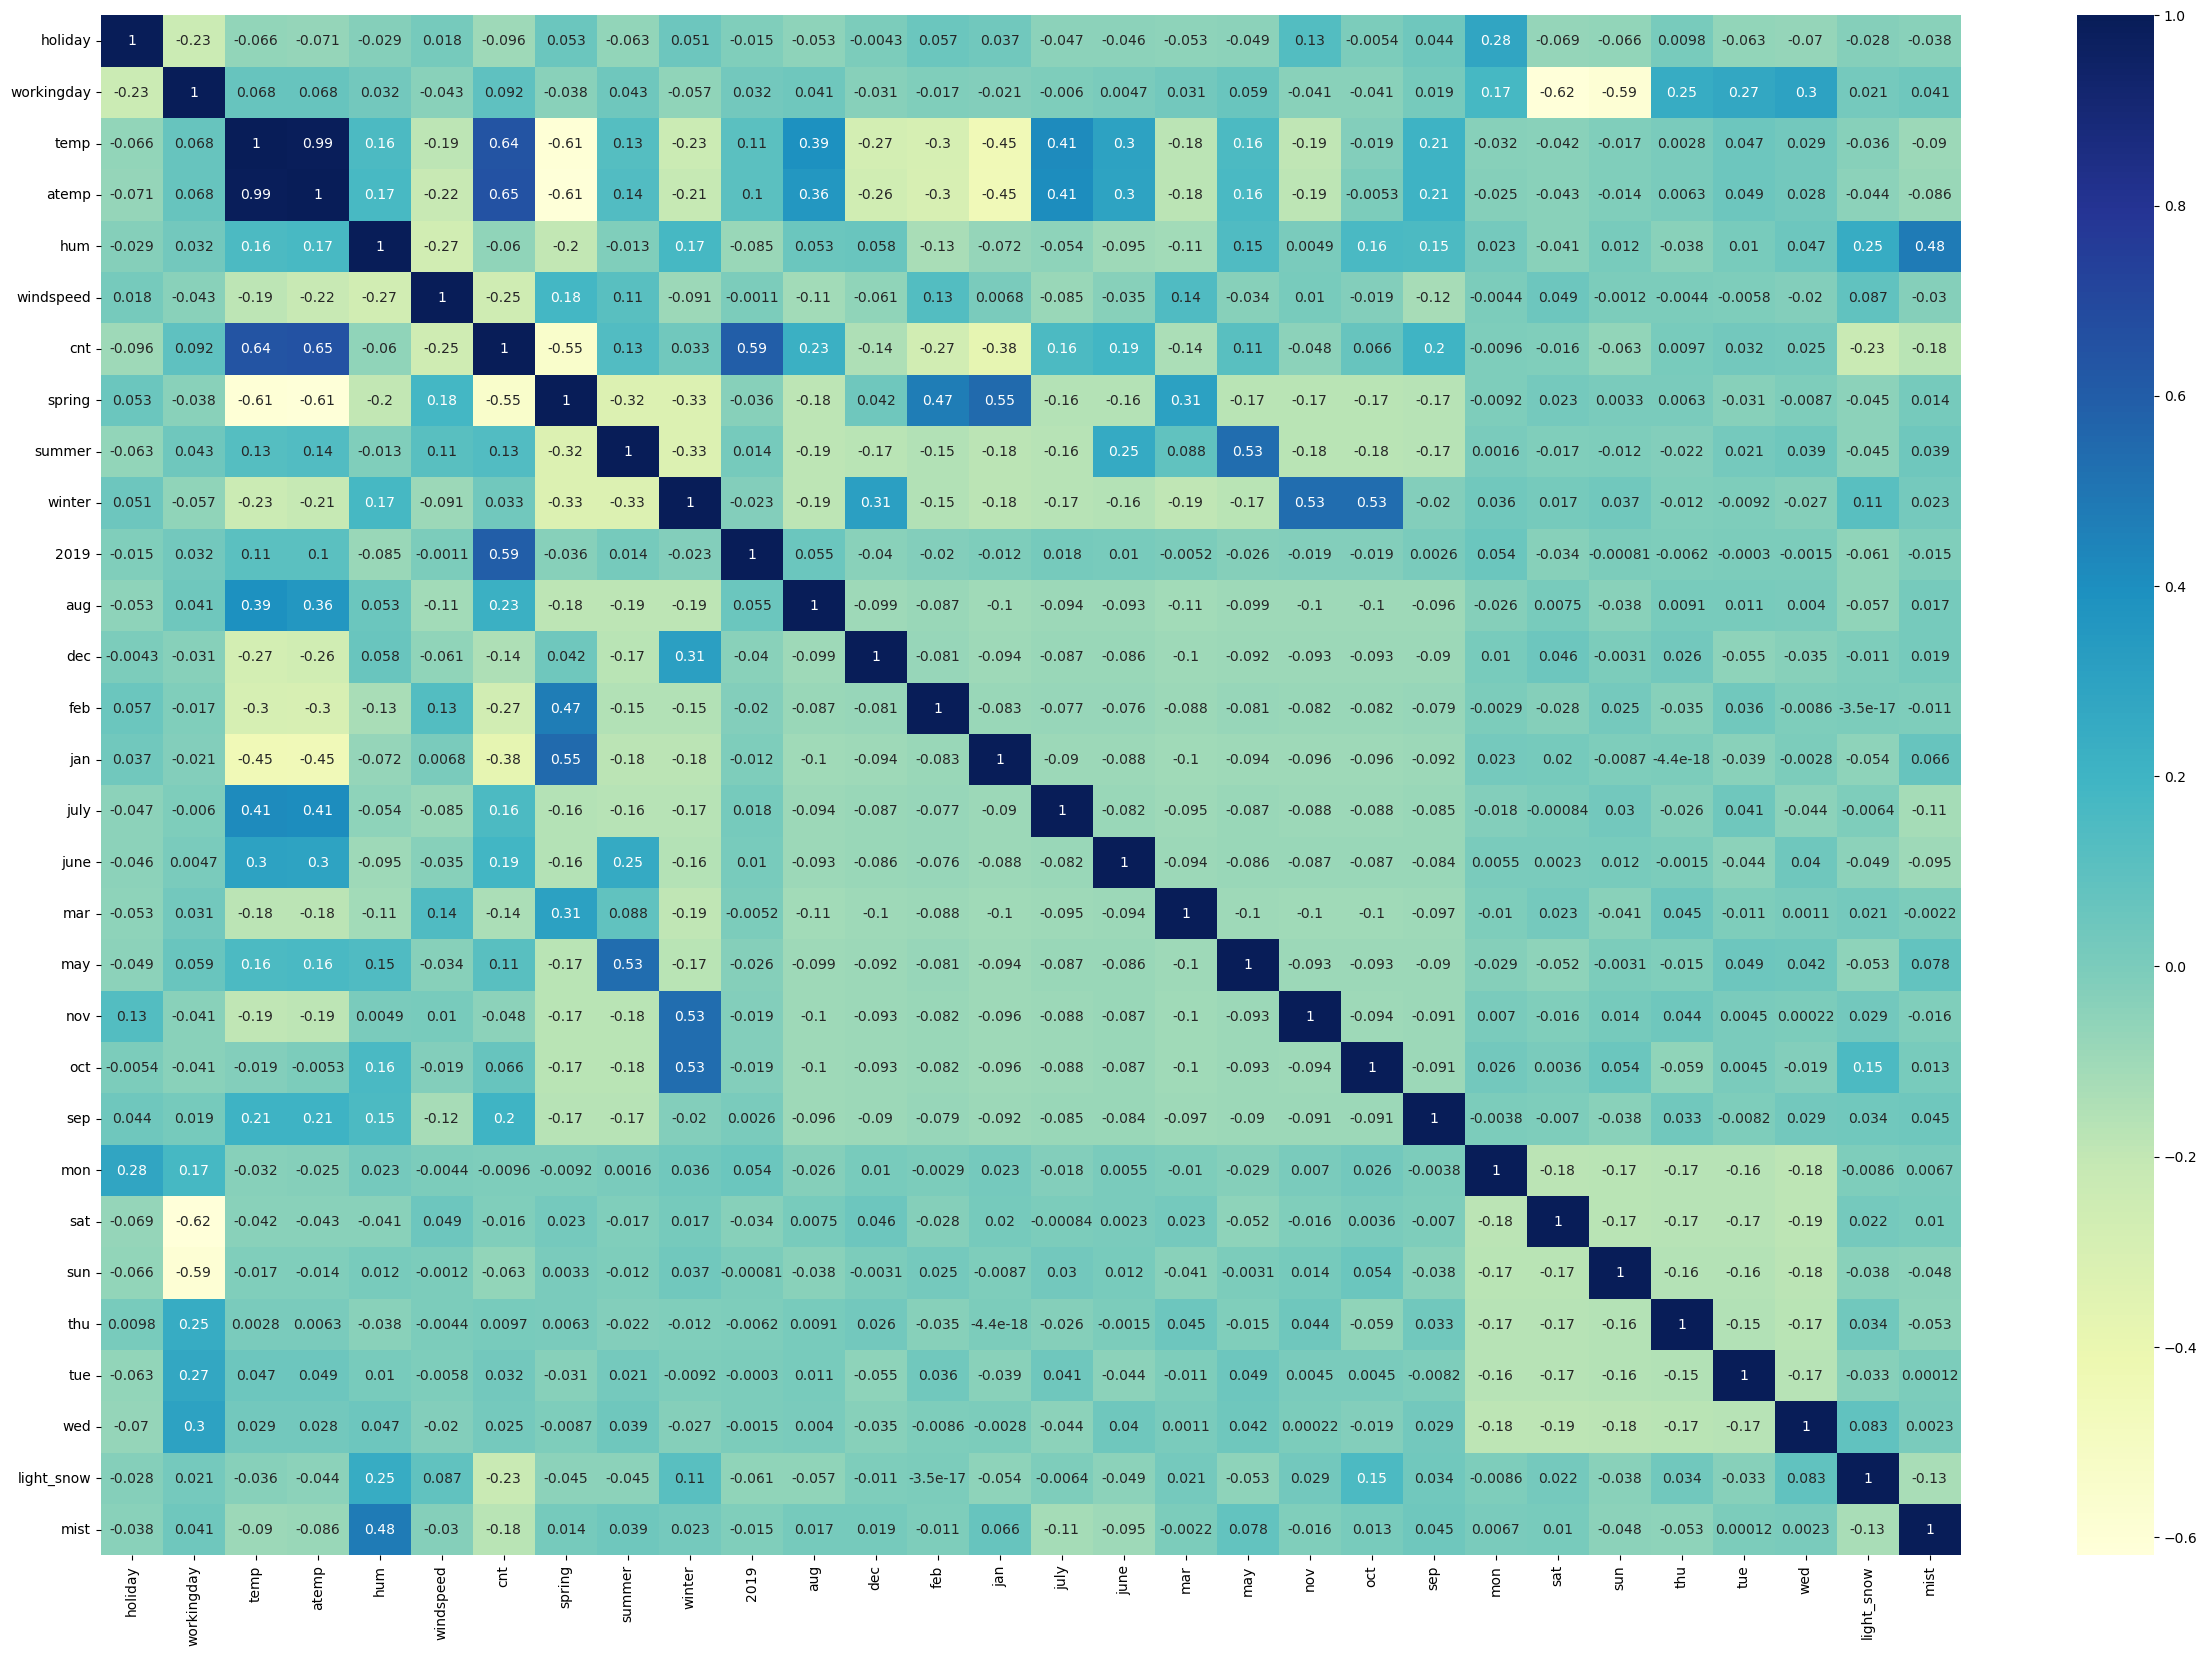

In [23]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [24]:
boombikes.columns, boombikes.shape

(Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
        'spring', 'summer', 'winter', '2019', 'aug', 'dec', 'feb', 'jan',
        'july', 'june', 'mar', 'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun',
        'thu', 'tue', 'wed', 'light_snow', 'mist'],
       dtype='object'),
 (730, 30))

### Step 5: Building a linear model


Dividing into X and Y sets for the model building

In [25]:
y_train = df_train.pop('cnt')
X_train = df_train

- We will do both automated and manual feature elimination
- We will use RFE for coarse feature elimination
- We will do manual feature elimination for fine tuning

Using RFE for automated feature elimination

In [26]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# 1 - Instantiate an object

lm = LinearRegression()

# 2 - Fit on data
lm.fit(X_train, y_train)

# 3 - RFE
# running RFE with 15 variables as output
### TypeError: RFE.__init__() takes 2 positional arguments but 3 were given
rfe = RFE(lm, step = 15) 

# 4 - Fit on data
rfe = rfe.fit(X_train, y_train)

In [27]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 2),
 ('summer', False, 2),
 ('winter', True, 1),
 ('2019', True, 1),
 ('aug', False, 2),
 ('dec', False, 2),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', False, 2),
 ('june', False, 2),
 ('mar', False, 2),
 ('may', False, 2),
 ('nov', False, 2),
 ('oct', False, 2),
 ('sep', True, 1),
 ('mon', False, 2),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 2),
 ('tue', False, 2),
 ('wed', False, 2),
 ('light_snow', True, 1),
 ('mist', True, 1)]

In [28]:
col = X_train.columns[rfe.support_]
col # columns selected by RFE

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'winter',
       '2019', 'jan', 'sep', 'sat', 'sun', 'light_snow', 'mist'],
      dtype='object')

In [29]:
X_train.columns[~rfe.support_]

# Following columns are not selected by RFE


Index(['spring', 'summer', 'aug', 'dec', 'feb', 'july', 'june', 'mar', 'may',
       'nov', 'oct', 'mon', 'thu', 'tue', 'wed'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics


In [30]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]


In [31]:
# Adding a constant variable

import statsmodels.api as sm

X_train_rfe_sm = sm.add_constant(X_train_rfe)

# Running the linear model

lm = sm.OLS(y_train, X_train_rfe_sm)

# Fit the model
lm = lm.fit()

# Summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          2.39e-178
Time:                        12:06:16   Log-Likelihood:                 483.39
No. Observations:                 510   AIC:                            -938.8
Df Residuals:                     496   BIC:                            -879.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1811      0.024      7.467      0.000       0.133       0.229
holiday       -0.0264      0.022     -1.187      0.236      -0.070       0.017
workingday     0.0818      0.009      8.618      0.000       0.063       0.100
temp           0.4344      0.134      3.246      0.001       0.171       0.697
atemp          0.1058      0.143      0.742      0.459      -0.174       0.386
hum           -0.1360      0.040     -3.432      0.001      -0.214      -0.058
windspeed     -0.1730      0.027     -6.307      0.000      -0.227      -0.119
winter         0.0966      0.011      8.691      0.000       0.075       0.118
2019           0.2313      0.009     27.039      0.000       0.214       0.248
jan           -0.0761      0.018     -4.270      0.000      -0.111      -0.041
sep            0.0771      0.016      4.808      0.000       0.046       0.109
sat            0.0903      0.012      7.662      0.000       0.067       0.113
sun            0.0353      0.012      2.850      0.005       0.011       0.060
light_snow    -0.2540      0.028     -9.113      0.000      -0.309      -0.199
mist          -0.0537      0.011     -4.848      0.000      -0.076      -0.032
==============================================================================
Omnibus:                       50.667   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.737
Skew:                          -0.586   Prob(JB):                     1.33e-22
Kurtosis:                       4.835   Cond. No.                     1.16e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.18e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Predictors with high p-values: holiday, atemp.

Let's check VIF

In [32]:
# Check for the VIF values of the feature variables.

from statsmodels.stats.outliers_influence import variance_inflation_factor



In [33]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def calculateVIF (training_set):
    vif = pd.DataFrame()
    vif['Features'] = training_set.columns
    vif['VIF'] = [variance_inflation_factor(training_set.values, i) for i in range(training_set.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif
print(calculateVIF(X_train_rfe))

      Features    VIF
3        atemp  51.66
2         temp  51.39
1   workingday  33.86
10         sat   8.36
11         sun   8.16
0      holiday   2.23
4          hum   1.88
13        mist   1.56
8          jan   1.44
6       winter   1.30
12  light_snow   1.25
5    windspeed   1.22
9          sep   1.07
7         2019   1.03


Observation:
- High VIF: atemp, temp, workingdat, sat, sun
- High p-value: atemp, holiday
- atemp has high p-value and High VIF

In [34]:
# Model calculation function 
def model(X_train, y_train):
    # Adding a constant variable
    X_train_sm = sm.add_constant(X_train)
    # Running the linear model
    lm = sm.OLS(y_train, X_train_sm)
    # Fit the model
    lm = lm.fit()
    return lm, X_train_sm


In [35]:
# Removing atemp from the columns list
X_train_rfe2 = X_train_rfe.drop('atemp', axis = 1)
lm2,X_train_rfe2_sm = model(X_train_rfe2, y_train)
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     195.4
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          2.20e-179
Time:                        12:06:16   Log-Likelihood:                 483.11
No. Observations:                 510   AIC:                            -940.2
Df Residuals:                     497   BIC:                            -885.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1823      0.024      7.537      0.000       0.135       0.230
holiday       -0.0267      0.022     -1.201      0.230      -0.070       0.017
workingday     0.0823      0.009      8.694      0.000       0.064       0.101
temp           0.5319      0.024     21.806      0.000       0.484       0.580
hum           -0.1339      0.040     -3.390      0.001      -0.212      -0.056
windspeed     -0.1764      0.027     -6.528      0.000      -0.229      -0.123
winter         0.0973      0.011      8.790      0.000       0.076       0.119
2019           0.2312      0.009     27.048      0.000       0.214       0.248
jan           -0.0769      0.018     -4.320      0.000      -0.112      -0.042
sep            0.0769      0.016      4.800      0.000       0.045       0.108
sat            0.0908      0.012      7.718      0.000       0.068       0.114
sun            0.0359      0.012      2.899      0.004       0.012       0.060
light_snow    -0.2557      0.028     -9.210      0.000      -0.310      -0.201
mist          -0.0540      0.011     -4.880      0.000      -0.076      -0.032
==============================================================================
Omnibus:                       49.257   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.970
Skew:                          -0.571   Prob(JB):                     5.32e-22
Kurtosis:                       4.818   Cond. No.                     1.10e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.2e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Observation: 
- Even after dropping the column: atemp, there is no change in our R-squared or Adj. R-squared
- This is a good sign that atemp was irrelevant and had multicolinearity with some other column (probably temp)

- holiday still has a high p-value

In [36]:
# Check for the VIF values of the feature variables.
vif = calculateVIF(X_train_rfe2)
vif

,Features,VIF
1,workingday,33.66
9,sat,8.31
10,sun,8.12
0,holiday,2.23
3,hum,1.87
2,temp,1.71
12,mist,1.56
7,jan,1.44
5,winter,1.29
11,light_snow,1.24


Observation:
- High VIF: workingday, sat, sun
- High p-value: holiday

Steps:
- Remove the variable with high p-value and then re-eavluate the model, there is a chance that the VIF may decrease
- Let's drop holiday

In [37]:
# Removing holiday from the column list

X_train_rfe3 = X_train_rfe2.drop('holiday', axis = 1)

lm3,X_train_rfe3_sm = model(X_train_rfe3, y_train)
lm3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     195.4
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          2.20e-179
Time:                        12:06:16   Log-Likelihood:                 483.11
No. Observations:                 510   AIC:                            -940.2
Df Residuals:                     497   BIC:                            -885.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1556      0.039      3.956      0.000       0.078       0.233
workingday     0.1090      0.027      4.027      0.000       0.056       0.162
temp           0.5319      0.024     21.806      0.000       0.484       0.580
hum           -0.1339      0.040     -3.390      0.001      -0.212      -0.056
windspeed     -0.1764      0.027     -6.528      0.000      -0.229      -0.123
winter         0.0973      0.011      8.790      0.000       0.076       0.119
2019           0.2312      0.009     27.048      0.000       0.214       0.248
jan           -0.0769      0.018     -4.320      0.000      -0.112      -0.042
sep            0.0769      0.016      4.800      0.000       0.045       0.108
sat            0.1175      0.029      4.106      0.000       0.061       0.174
sun            0.0626      0.029      2.175      0.030       0.006       0.119
light_snow    -0.2557      0.028     -9.210      0.000      -0.310      -0.201
mist          -0.0540      0.011     -4.880      0.000      -0.076      -0.032
==============================================================================
Omnibus:                       49.257   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.970
Skew:                          -0.571   Prob(JB):                     5.32e-22
Kurtosis:                       4.818   Cond. No.                         23.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observation:
- No change in R-squared and Adj. R-squared
- All p-values are below 0.05 
- Signs of a good model

In [38]:
# Let's check the VIF values of the feature variables

vif = calculateVIF(X_train_rfe3)
vif

,Features,VIF
2,hum,26.65
0,workingday,15.91
1,temp,10.80
8,sat,4.33
3,windspeed,4.28
9,sun,4.23
11,mist,2.21
5,2019,2.07
4,winter,1.68
6,jan,1.49


Changes in VIF:
- hum: 1.87 to 26.65
- workingday: 33.66 to 15.91
- temp: 1.71 to 10.80

In [39]:
# Removing hum from the column list

X_train_rfe4 = X_train_rfe3.drop('hum', axis = 1)

lm4,X_train_rfe4_sm = model(X_train_rfe4, y_train)
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     207.7
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          4.27e-178
Time:                        12:06:17   Log-Likelihood:                 477.28
No. Observations:                 510   AIC:                            -930.6
Df Residuals:                     498   BIC:                            -879.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0803      0.033      2.447      0.015       0.016       0.145
workingday     0.1098      0.027      4.014      0.000       0.056       0.164
temp           0.5117      0.024     21.408      0.000       0.465       0.559
windspeed     -0.1520      0.026     -5.774      0.000      -0.204      -0.100
winter         0.0899      0.011      8.196      0.000       0.068       0.111
2019           0.2343      0.009     27.281      0.000       0.217       0.251
jan           -0.0803      0.018     -4.476      0.000      -0.116      -0.045
sep            0.0731      0.016      4.524      0.000       0.041       0.105
sat            0.1199      0.029      4.149      0.000       0.063       0.177
sun            0.0608      0.029      2.094      0.037       0.004       0.118
light_snow    -0.2925      0.026    -11.323      0.000      -0.343      -0.242
mist          -0.0757      0.009     -8.293      0.000      -0.094      -0.058
==============================================================================
Omnibus:                       47.779   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.239
Skew:                          -0.573   Prob(JB):                     2.54e-20
Kurtosis:                       4.713   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# Let's check the VIF values of the feature variables

vif = calculateVIF(X_train_rfe4)
vif

,Features,VIF
0,workingday,10.51
1,temp,8.47
2,windspeed,4.28
7,sat,3.18
8,sun,2.96
4,2019,2.06
10,mist,1.57
3,winter,1.48
5,jan,1.41
6,sep,1.16


Observation:
- No major change in R-squared and Adj. R-squared, just a small drop
- All p-values are below 0.05 
- High VIF: workingday, temp

In [41]:
# Removing workingday from the column list
X_train_rfe5 = X_train_rfe4.drop('workingday', axis = 1)
lm5,X_train_rfe5_sm = model(X_train_rfe5, y_train)
lm5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     220.2
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          7.52e-176
Time:                        12:06:17   Log-Likelihood:                 469.16
No. Observations:                 510   AIC:                            -916.3
Df Residuals:                     499   BIC:                            -869.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1843      0.020      9.035      0.000       0.144       0.224
temp           0.5163      0.024     21.302      0.000       0.469       0.564
windspeed     -0.1546      0.027     -5.790      0.000      -0.207      -0.102
winter         0.0876      0.011      7.881      0.000       0.066       0.109
2019           0.2348      0.009     26.936      0.000       0.218       0.252
jan           -0.0821      0.018     -4.508      0.000      -0.118      -0.046
sep            0.0690      0.016      4.220      0.000       0.037       0.101
sat            0.0143      0.012      1.179      0.239      -0.010       0.038
sun           -0.0447      0.013     -3.554      0.000      -0.069      -0.020
light_snow    -0.2874      0.026    -10.976      0.000      -0.339      -0.236
mist          -0.0736      0.009     -7.954      0.000      -0.092      -0.055
==============================================================================
Omnibus:                       58.845   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.392
Skew:                          -0.669   Prob(JB):                     3.23e-26
Kurtosis:                       4.933   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Let's check the VIF values of the feature variables

vif = calculateVIF(X_train_rfe5)
vif

,Features,VIF
0,temp,3.68
1,windspeed,3.21
3,2019,2.03
9,mist,1.50
2,winter,1.30
6,sat,1.21
7,sun,1.20
4,jan,1.18
5,sep,1.15
8,light_snow,1.08


Observation:
- No High VIF - no multicollinearity
- High p-value: sat - 0.239 > 0.05

In [43]:
# Let's remove 'sat' column from the column list

X_train_rfe6 = X_train_rfe5.drop('sat', axis = 1)
lm6, X_train_rfe6_sm = model(X_train_rfe6, y_train)
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     244.3
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          9.34e-177
Time:                        12:06:17   Log-Likelihood:                 468.45
No. Observations:                 510   AIC:                            -916.9
Df Residuals:                     500   BIC:                            -874.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1868      0.020      9.202      0.000       0.147       0.227
temp           0.5158      0.024     21.276      0.000       0.468       0.563
windspeed     -0.1532      0.027     -5.740      0.000      -0.206      -0.101
winter         0.0879      0.011      7.904      0.000       0.066       0.110
2019           0.2345      0.009     26.902      0.000       0.217       0.252
jan           -0.0819      0.018     -4.495      0.000      -0.118      -0.046
sep            0.0690      0.016      4.215      0.000       0.037       0.101
sun           -0.0473      0.012     -3.819      0.000      -0.072      -0.023
light_snow    -0.2872      0.026    -10.964      0.000      -0.339      -0.236
mist          -0.0736      0.009     -7.950      0.000      -0.092      -0.055
==============================================================================
Omnibus:                       54.670   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.363
Skew:                          -0.619   Prob(JB):                     6.57e-25
Kurtosis:                       4.925   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# Let's check the VIF values of the feature variables

vif = calculateVIF(X_train_rfe6)
vif

,Features,VIF
0,temp,3.63
1,windspeed,3.15
3,2019,2.03
8,mist,1.50
2,winter,1.29
4,jan,1.17
6,sun,1.16
5,sep,1.15
7,light_snow,1.08


Observation:
- All predictors have low VIF and low p-value
- Low multi-collinearity and all predictors are significant
- This can be considered as a final model for now

### Step 6: Residual analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.


In [45]:
y_train_pred = lm6.predict(X_train_rfe6_sm)

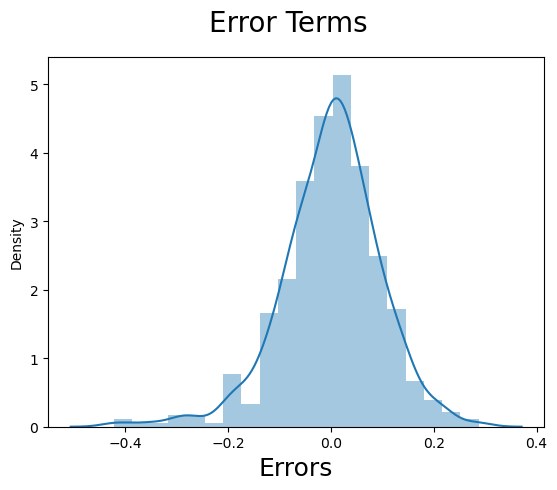

In [46]:
res = y_train - y_train_pred

# Let's plot the histogram of the error terms

fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

Observation: From the histogram, we can see that the error terms are normally distributed


#### Step 7: Making Predictions Using the Final Model


Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. sixth model.



##### Step 7.1: Scaling the test variables

In [47]:
# Applying the scaling on the test sets

# Repeating step 4.1 - Rescaling the features

# Numerical 
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# 1 - Transforming the test set
df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,light_snow,mist
184,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [48]:
df_test.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,light_snow,mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Step 7.2: Dividing into X_test and y_test


In [49]:
y_test = df_test.pop('cnt')
X_test = df_test

In [50]:
selected_model = lm6
corresponding_training_data = X_train_rfe6
corresponding_training_data_sm = X_train_rfe6_sm

In [51]:
# Removing the columns which were removed from the training set

X_test_sm = X_test[corresponding_training_data.columns]

# Adding constant variable to X_test

X_test_sm = sm.add_constant(X_test_sm)

X_test_sm.head()

,const,temp,windspeed,winter,2019,jan,sep,sun,light_snow,mist
184,1.0,0.831783,0.084219,0,0,0,0,0,0,1
535,1.0,0.901354,0.153728,0,1,0,0,0,0,0
299,1.0,0.511964,0.334206,1,0,0,0,0,0,1
221,1.0,0.881625,0.339570,0,0,0,0,0,0,0
152,1.0,0.817246,0.537414,0,0,0,0,0,0,0


In [52]:
X_test_sm.shape, corresponding_training_data_sm.shape

((219, 10), (510, 10))

In [53]:
# Making predictions on test data using the sixth model

y_pred = selected_model.predict(X_test_sm)

#### Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.



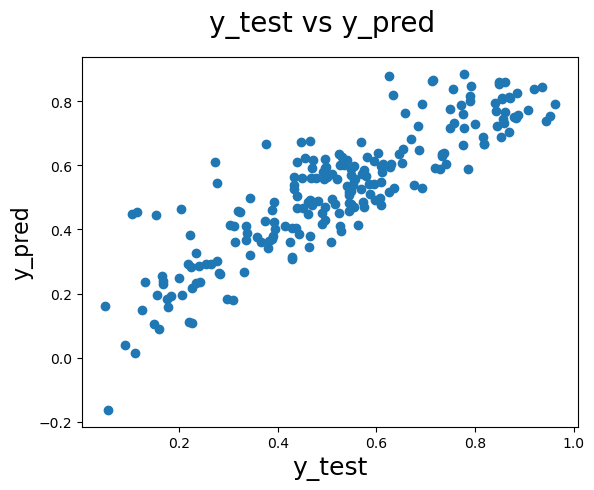

In [54]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      
plt.show()

In [55]:
selected_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     244.3
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          9.34e-177
Time:                        12:06:17   Log-Likelihood:                 468.45
No. Observations:                 510   AIC:                            -916.9
Df Residuals:                     500   BIC:                            -874.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1868      0.020      9.202      0.000       0.147       0.227
temp           0.5158      0.024     21.276      0.000       0.468       0.563
windspeed     -0.1532      0.027     -5.740      0.000      -0.206      -0.101
winter         0.0879      0.011      7.904      0.000       0.066       0.110
2019           0.2345      0.009     26.902      0.000       0.217       0.252
jan           -0.0819      0.018     -4.495      0.000      -0.118      -0.046
sep            0.0690      0.016      4.215      0.000       0.037       0.101
sun           -0.0473      0.012     -3.819      0.000      -0.072      -0.023
light_snow    -0.2872      0.026    -10.964      0.000      -0.339      -0.236
mist          -0.0736      0.009     -7.950      0.000      -0.092      -0.055
==============================================================================
Omnibus:                       54.670   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.363
Skew:                          -0.619   Prob(JB):                     6.57e-25
Kurtosis:                       4.925   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that the equation of our best fitted line is:

cnt = 0.1868\
    + (temp * 0.5158)\
    + (windspeed * -0.1532)\
    + (winter * 0.0879)\
    + (2019 * 0.2345)\
    + (jan * -0.0819)\
    + (sep * 0.069)\
    + (sun * -0.0473)\
    + (light_now * -0.0473)\
    + (mist * -0.0736)

In [56]:
# Evaluating the model

from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7675344746595867